# 디지털 영상의 이해

## 디지털 영상 표현
* 디지털 영상
  - 일정한 수의 화소(pixel: picture elements)들의 모임
  - 화소의 샘플링(sampling): 각 화소는 2차원 공간 상의 $x$축과 $y$축 상에 일정한 간격으로 위치
  - 각 화소의 밝기(intensity)의 양자화(quantization): 유한하고, 이산 값을 갖는 숫자로 표현됨

## 영상의 유형
* 단일 채널 영상
  - 이진(binary) 영상
  - 흑백(gray-scale) 영상
* 다중 채널 영상
  - 3 채널: RGB, HSV, 
  - 4 채널: RGBA

# Python에서 사용할 수 있는 영상 처리 라이브러리
- Pillow: PIL.Image
- Scikit-image: skimage.io
- Matplotlib: matplotlib.image
- ImageIO: imageio
- OpenCV: cv2

**참고** 
- 모듈: 함수나 변수 또는 클래스를 모아 놓은 파일


## PIL 이용하기

* Pillow Tutorial(https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)

In [ ]:
from PIL import Image

In [2]:
filename = 'flower512.png' # PNG: portable Network graphics

im = Image.open(filename)
im.show()

In [3]:
type(im)

PIL.PngImagePlugin.PngImageFile

In [4]:
with Image.open(filename) as im:
    im.show()

In [5]:
filename2 = 'bird.jpg' # jpg: JPEG, Joint Photographic Experts Group
with Image.open(filename2) as im2:
    im2.show()

In [6]:
im2 = im2.rotate(30)
im2.show()

In [7]:
print(im.size)
print(im.width, im.height)
print(im.mode)
print(im.format)

(512, 512)
512 512
RGB
PNG


* 영상 파일 저장하기

In [9]:
im.save('flower512.jpg')


In [10]:
im3 = Image.open('flower512.jpg')
print(im3.format) 

JPEG


In [11]:
print(im3.size)
print(im3.width, im2.height)
print(im3.mode)
print(im3.format)

(512, 512)
512 425
RGB
JPEG


### Matplotlib.pyplot의 imshow() 함수로 영상 표시하기

In [12]:
import matplotlib.pyplot as plt

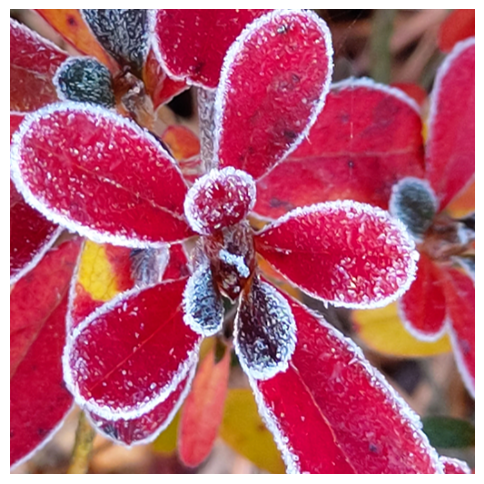

In [13]:
plt.figure(figsize=(6,8))
plt.imshow(im)
plt.axis('off')
plt.show()

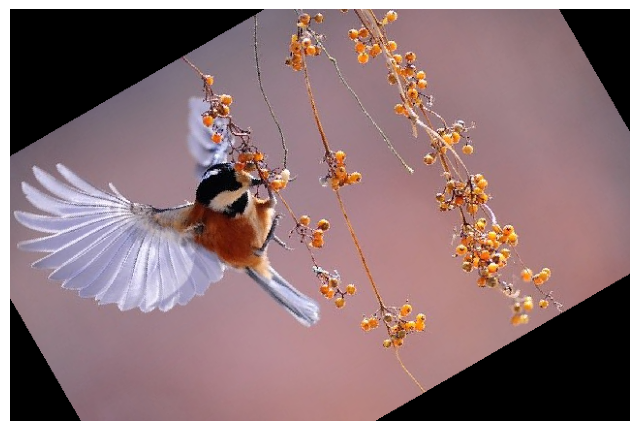

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(im2)
plt.axis('off')
plt.show()

## scikit-image 이용하기
- scipy.ndimage를 기반으로 개발되고 있는 영상 처리 라이브러리
- SciPy (https://scipy.org/)
  * NumPy를 기반으로 수학 알고리즘과 함수들을 모아 놓은 과학 계산용 라이브러리
  * SciPy ndimage: 다차원 영상 처리 함수들을 모아 놓은 모듈
    - scipy.ndimage(https://docs.scipy.org/doc/scipy/reference/ndimage.html)
    - 영상 입출력, 화면에 영상 표시
    - 기본 조작 (basic manipulation)
    - 영상 필터링 (image filtering)
    - 영상 세그멘테이션 (image segmentation)
    - 분류 (classification)
    - 특징 추출 (feature extraction)
    - 영상 정합 (image registration)

- Home page: https://scikit-image.org/

In [15]:
from skimage import io

In [16]:
im4 = io.imread(filename2)

In [17]:
type(im4)

numpy.ndarray

In [18]:
im4.shape

(425, 640, 3)

In [19]:
im4.dtype

dtype('uint8')

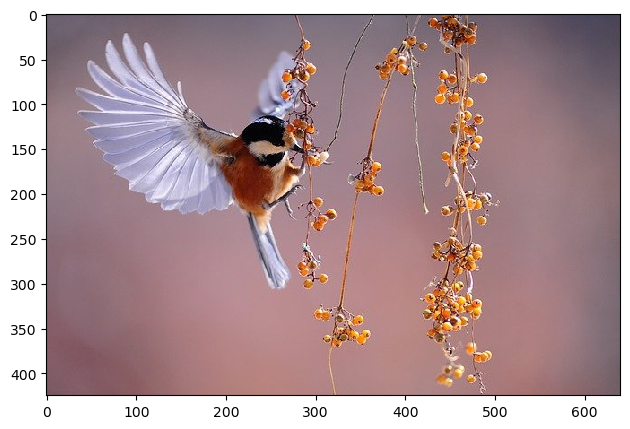

In [20]:
io.imshow(im4)

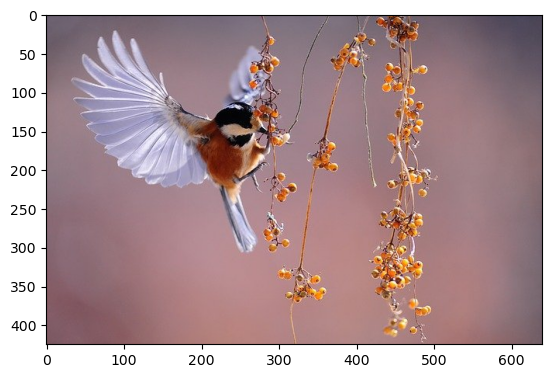

In [21]:
plt.imshow(im4)

In [22]:
from skimage import color, filters
im4 = io.imread(filename)
im4.shape

(512, 512, 3)

In [23]:
im4gray = color.rgb2gray(im4)

In [24]:
im4gray.shape

(512, 512)

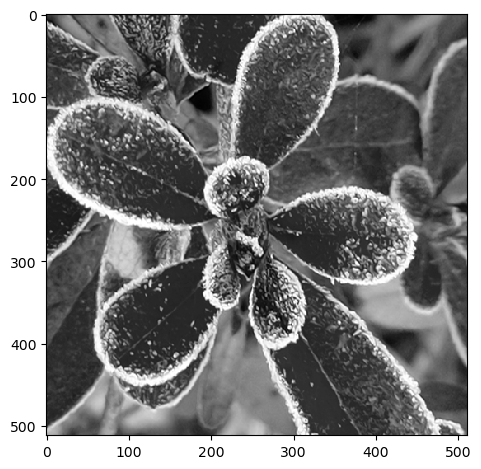

In [25]:
io.imshow(im4gray)

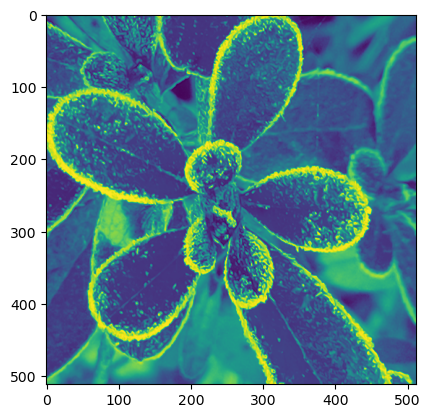

In [26]:
plt.imshow(im4gray)

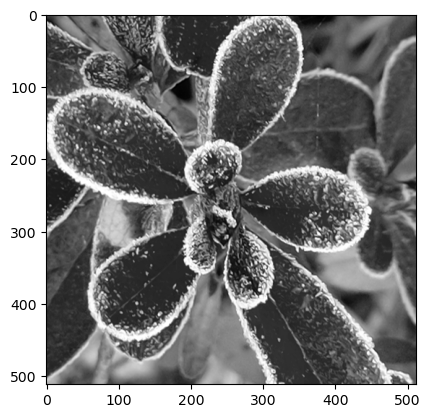

In [27]:
plt.imshow(im4gray, cmap='gray')

- Sobel 연산자 적용

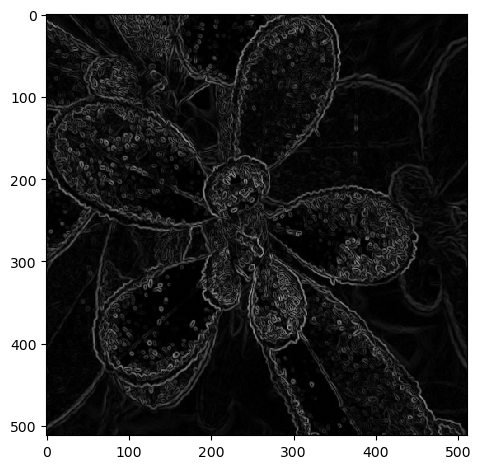

In [28]:
edge = filters.sobel(im4gray)
io.imshow(edge)

* Skikit-image io 모듈에서 영상 저장하기

In [29]:
io.imsave('flower512-2.jpg', im4)

- Scikit-image의 영상 데이터셋 이용하기

In [30]:
from skimage import data

In [31]:
dir(data)

['astronaut',
 'binary_blobs',
 'brain',
 'brick',
 'camera',
 'cat',
 'cell',
 'cells3d',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'colorwheel',
 'data_dir',
 'download_all',
 'eagle',
 'file_hash',
 'grass',
 'gravel',
 'horse',
 'hubble_deep_field',
 'human_mitosis',
 'immunohistochemistry',
 'kidney',
 'lbp_frontal_face_cascade_filename',
 'lfw_subset',
 'lily',
 'logo',
 'microaneurysms',
 'moon',
 'nickel_solidification',
 'page',
 'palisades_of_vogt',
 'protein_transport',
 'retina',
 'rocket',
 'shepp_logan_phantom',
 'skin',
 'stereo_motorcycle',
 'text',
 'vortex']

In [32]:
help(data.coins)

Help on function coins in module skimage.data._fetchers:

coins()
    Greek coins from Pompeii.

    This image shows several coins outlined against a gray background.
    It is especially useful in, e.g. segmentation tests, where
    individual objects need to be identified against a background.
    The background shares enough grey levels with the coins that a
    simple segmentation is not sufficient.

    Notes
    -----
    This image was downloaded from the
    `Brooklyn Museum Collection
    <https://www.brooklynmuseum.org/opencollection/archives/image/51611>`__.

    No known copyright restrictions.

    Returns
    -------
    coins : (303, 384) uint8 ndarray
        Coins image.



(303, 384)


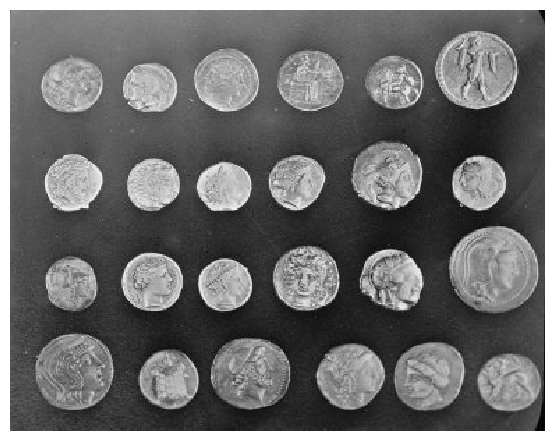

In [33]:
im = data.coins()
print(im.shape)
io.imshow(im)
plt.axis('off')
plt.show()

In [34]:
type(im)

numpy.ndarray

In [35]:
io.imsave("coins.jpg", im)

### Matplotlib.image 이용하기

In [36]:
import matplotlib.image as mpimg

In [37]:
im5 = mpimg.imread(filename)

In [38]:
type(im5)

numpy.ndarray

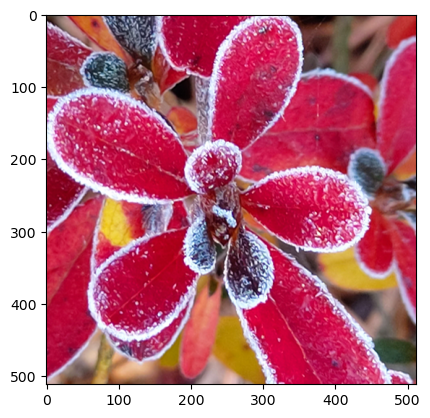

In [39]:
plt.imshow(im5)

In [40]:
mpimg.imsave("flower512-3.jpg", im5)

### imageIO 라이브러리 이용하기

- imageio homepage: https://imageio.readthedocs.io/en/stable/

In [41]:
import imageio as iio

In [42]:
im6 = iio.imread(filename)

C:\Users\seopp\AppData\Local\Temp\ipykernel_22252\2040172326.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im6 = iio.imread(filename)


In [43]:
type(im6)

numpy.ndarray

In [44]:
help(im6)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any object that can

In [45]:
im6.shape

(512, 512, 3)

In [46]:
im6.dtype

dtype('uint8')

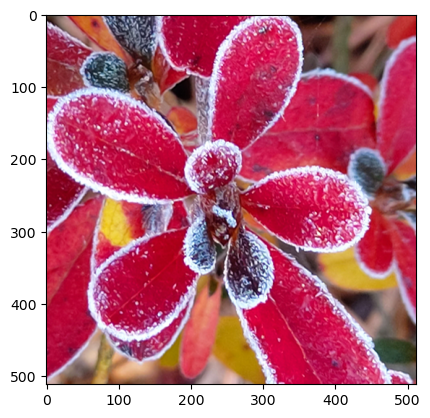

In [47]:
plt.imshow(im6)

In [48]:
iio.imsave("flower512-4.jpg", im6)

### OpenCV 라이브러리 이용하기
- OpenCV: Open Source Computer Vision (http://opencv.org)
- API 버전
  * cv: OpenCV C API binding, 더 이상 사용되지 않음
  * cv2: OpenCV C++ API binding

In [49]:
import cv2

In [50]:
cv2.__version__

'4.10.0'

In [51]:
im6 = cv2.imread(filename)

In [52]:
type(im6)

numpy.ndarray

In [53]:
im6.dtype

dtype('uint8')

In [54]:
im6.shape

(512, 512, 3)

In [ ]:
cv2.imshow("Flower", im6)
cv2.waitKey(0)
cv2.destroyWindow("Flower")

In [ ]:
cv2.imwrite("flower512-4.jpg", im6)

In [ ]:
img5_g = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)

In [ ]:
cv2.imshow("file_name"+'_gray', img5_g)
cv2.waitKey(0)
cv2.destroyAllWindows()
